In [29]:
# UPLOADING DATA FILE
from google.colab import files
upload = files.upload()

Saving master.csv to master (1).csv


# 1. For the data source at https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016,perform the following steps in python using pandas, matplotlib and/or seaborn. Use code cells toperform functions with a comment for each line explaining what it is doing (and using intuitive variablenames), and mark-down cells to note down any significant observations after each code cell (e.g.,“Variable X appears to be normal distributed”):
**a**. **Perform basic EDA [2]**

**b**. **Discrete variables: [2]**

 i. For each variable, identify the mode value using python commands.
 
 ii. For each variable, compute the entropy to see if there is diversity in the data. Theformula is −Σi pi
log pi , where i is the index of each category, and pi
is its probability Ni/N.

**c. Continuous variables: [3]**

i. For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75thpercentile, and inter-quartile range.

ii. For each variable, plot box-and-whiskers plots.

iii. For each variable, plot the histogram three times: with too few bins, too many bins, goodnumber of bins.

**d. Pair-wise interaction: [2]**

 i. Pick a two discrete-continuous pairs, and plot box-and-whiskers plot for the continuousvariable side-by-side for each value of the discrete variable.
 ii. Plot a heatmap of correlation between all pairs of continuous variables.

In [75]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab 
import statsmodels.api as sm
import math


## a. Perform basic EDA [2]

In [76]:
df = pd.read_csv('master.csv')
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [77]:
df.describe()  #describing the data

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [78]:
df.info()    #gives non-null count and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [79]:
df.isnull().sum()   #gives null count for each column

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Here we can observe that there are too many null entries in HDI column hence we will drop that column and won't do any analysis from that column.

In [80]:
df=df.drop(['HDI for year'],axis=1)

In [81]:
for col in df.columns.values:
  unique_val = pd.unique(df[col])
  print('Column ' + '"'+ col+'"'  + ' has ' + str(len(unique_val)) + ' unique values')

Column "country" has 101 unique values
Column "year" has 32 unique values
Column "sex" has 2 unique values
Column "age" has 6 unique values
Column "suicides_no" has 2084 unique values
Column "population" has 25564 unique values
Column "suicides/100k pop" has 5298 unique values
Column "country-year" has 2321 unique values
Column " gdp_for_year ($) " has 2321 unique values
Column "gdp_per_capita ($)" has 2233 unique values
Column "generation" has 6 unique values


Here we can conclude country,year,sex,age and generation are descrete variables and rest are continuous variables.

b. Discrete variables: [2]

## i. For each variable, identify the mode value using python commands.

In [82]:
dfd=df.drop(['suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)'],axis=1)


In [83]:
dfd.mode()

,country,year,sex,age,generation
0,Austria,2009.0,female,15-24 years,Generation X
1,Iceland,NaN,male,25-34 years,NaN
2,Mauritius,NaN,NaN,35-54 years,NaN
3,Netherlands,NaN,NaN,55-74 years,NaN
4,NaN,NaN,NaN,75+ years,NaN


b. Discrete variables: [2]



## ii. For each variable, compute the entropy to see if there is diversity in the data. Theformula is −Σi pi log pi , where i is the index of each category, and pi is its probability Ni/N.

In [84]:
def entropy(column):
  value,counts = np.unique(column, return_counts=True)
  pi = counts / counts.sum()
  return -(pi * np.log(pi)/np.log(math.e)).sum()      
for col in dfd.columns.values:
  x = str(entropy(dfd[col]))
  print('Column ' + '"'+ col+'"'  + ' has '+ x  + ' entropy')

Column "country" has 4.512115046503916 entropy
Column "year" has 3.4329561237563206 entropy
Column "sex" has 0.6931471805599453 entropy
Column "age" has 1.7917561564428144 entropy
Column "generation" has 1.6954491876355222 entropy


c. Continuous variables: [3]
## i. For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75thpercentile, and inter-quartile range.

In [85]:
dfc=df.drop(['country', 'year', 'sex', 'age','generation','country-year',' gdp_for_year ($) '],axis=1)
dfc.describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


In [86]:
for col in dfc.columns.values:
  print(col + ":")
  print("  mean                 ="+str(dfc[col].mean()))
  print("  variance             ="+str(dfc[col].var()))
  print("  skew                 ="+str(dfc[col].skew()))
  print("  min                  ="+str(dfc[col].min()))
  print("  max                  ="+str(dfc[col].max()))
  print("  median               ="+str(dfc[col].median()))
  print("  skew                 ="+str(dfc[col].skew()))
  print("  skew                 ="+str(dfc[col].skew()))
  print("  25th percentile      ="+str(np.percentile(dfc[col], 25, interpolation = 'midpoint')))
  print("  75th percentile      ="+str(np.percentile(dfc[col], 75, interpolation = 'midpoint')))
  print("  inter-quartile range ="+str(stats.iqr(dfc[col], interpolation = 'midpoint')))

suicides_no:
  mean                 =242.57440690150972
  variance             =813690.4442639101
  skew                 =10.352910335856805
  min                  =0
  max                  =22338
  median               =25.0
  skew                 =10.352910335856805
  skew                 =10.352910335856805
  25th percentile      =3.0
  75th percentile      =131.0
  inter-quartile range =128.0
population:
  mean                 =1844793.6173975556
  variance             =15302018400947.725
  skew                 =4.459414421535874
  min                  =278
  max                  =43805214
  median               =430150.0
  skew                 =4.459414421535874
  skew                 =4.459414421535874
  25th percentile      =97497.0
  75th percentile      =1486195.5
  inter-quartile range =1388698.5
suicides/100k pop:
  mean                 =12.816097411933864
  variance             =359.538899953126
  skew                 =2.963414476605633
  min                  =0.0
  max    

c. Continuous variables: [3]

## ii. For each variable, plot box-and-whiskers plots.

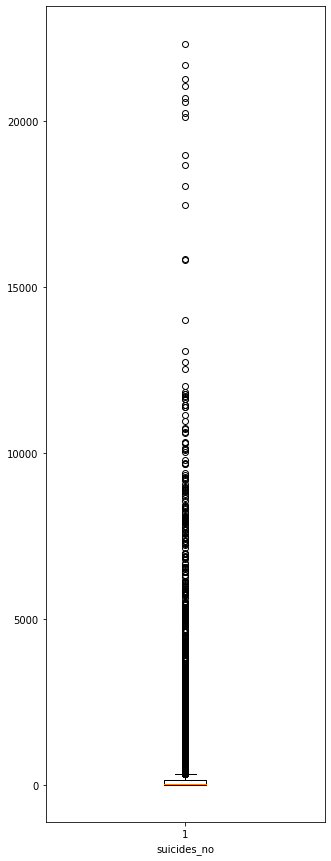

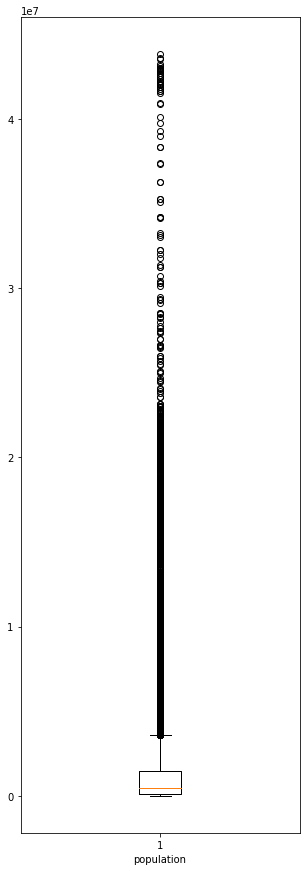

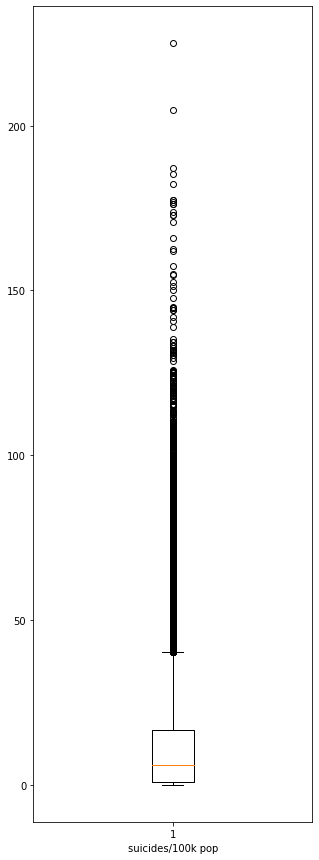

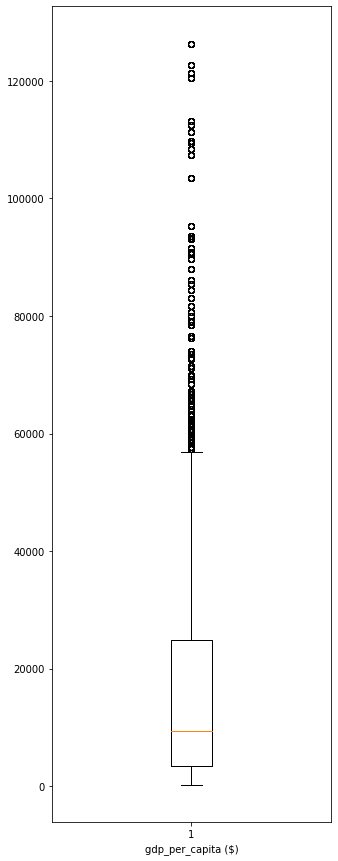

In [87]:
for col in dfc.columns.values:
  plt.figure(figsize=(5,15))
  plt.boxplot(dfc[col])
  plt.xlabel(col)
  plt.show()

c. Continuous variables: [3]

## iii. For each variable, plot the histogram three times: with too few bins, too many bins, goodnumber of bins.

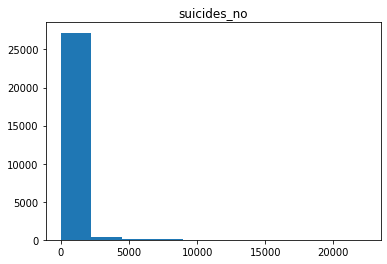

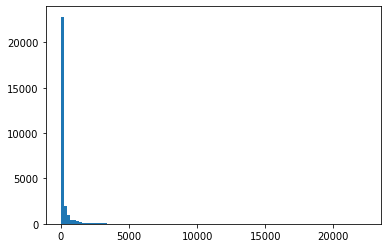

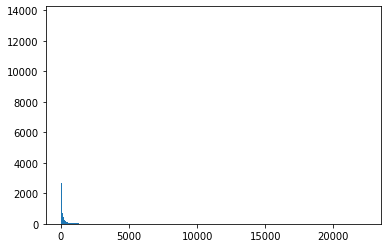

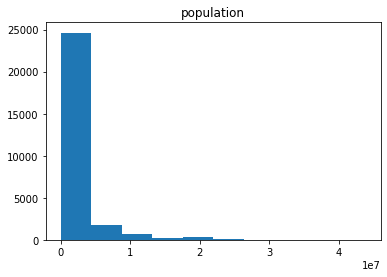

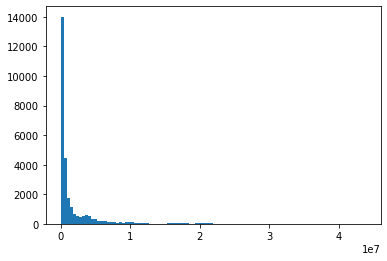

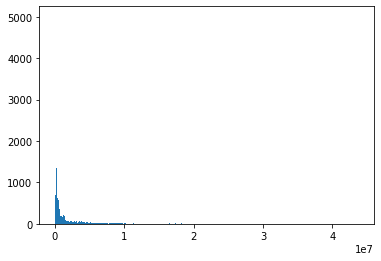

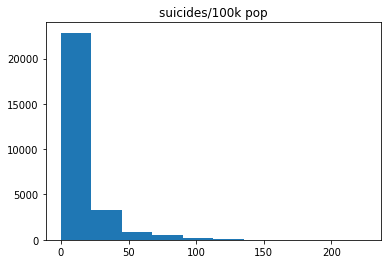

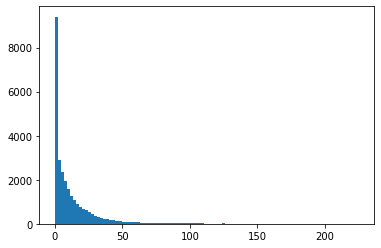

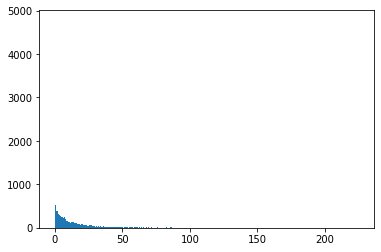

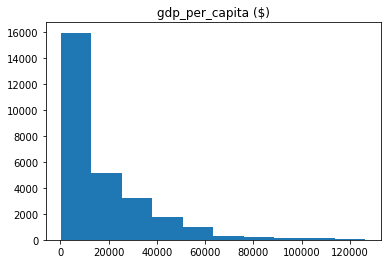

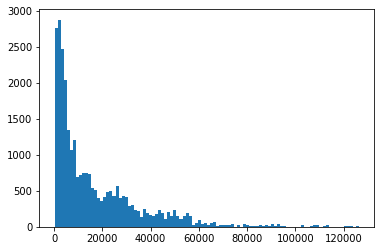

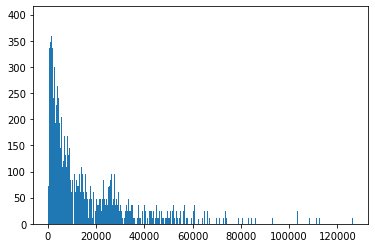

In [88]:
for col in dfc.columns.values:
   plt.title(col)
   plt.hist(dfc[col],10)  #too few bins
   plt.show()
   plt.hist(dfc[col],100)  #good number of bins
   plt.show()
   plt.hist(dfc[col],1000)  #too many bins
   plt.show()

d. Pair-wise interaction: [2]
## i. Pick a two discrete-continuous pairs, and plot box-and-whiskers plot for the continuous variable side-by-side for each value of the discrete variable.

Here I will take these two pairs:

(i) sex and suicides/100k pop

(ii) generation and population

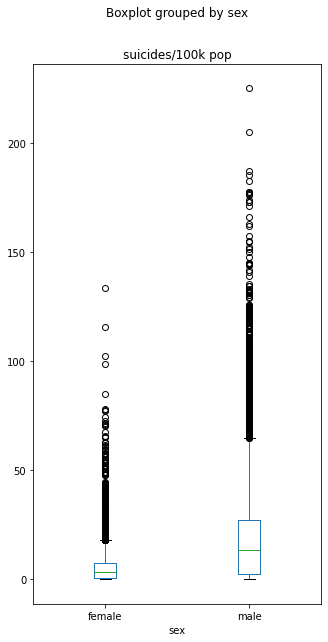

In [89]:
df.boxplot(by='sex', column='suicides/100k pop',grid=False,figsize=(5,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


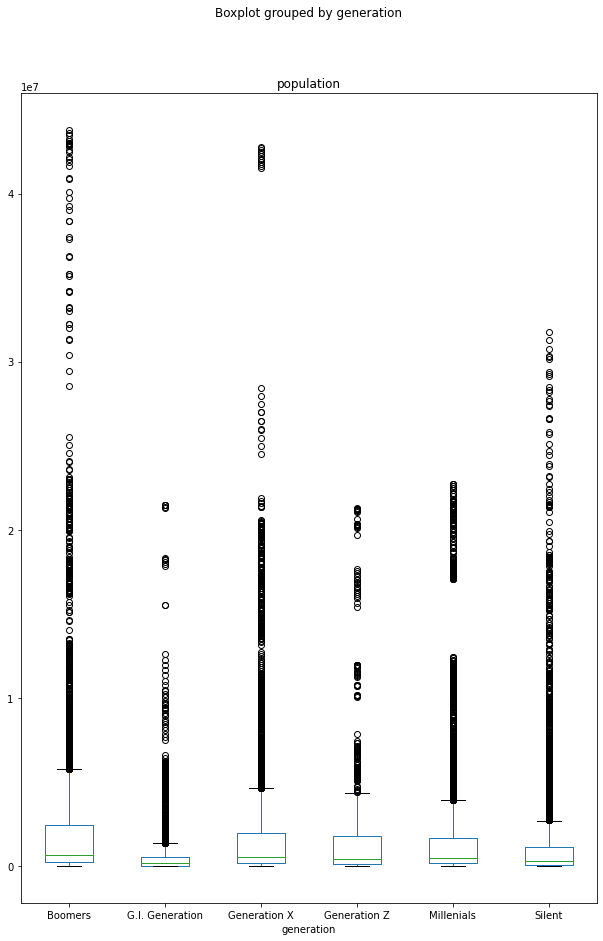

In [90]:
df.boxplot(by='generation', column='population',grid=False,figsize=(10,15))

d. Pair-wise interaction: [2]

## ii. Plot a heatmap of correlation between all pairs of continuous variables

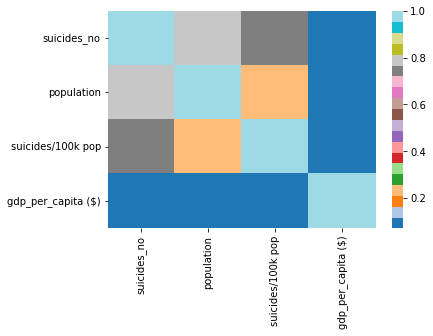

In [91]:
cor = dfc.corr(method='spearman') # correlation matrix
cmap="tab20"                 #i also changed the colors
sb.heatmap(abs(cor),cmap=cmap) # Show absolute value 
plt.show()

# 2. For the data source at https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016,visualize the following data with the appropriate type of graph, and use the right options to make thegraph look readable and professional (such as using legends and axes titles with the legible font size,and exploring color palettes): [6]

a. Pick the top six countries by average yearly suicides, and display their suicide for each yearseparately.

b. For the same six countries compare the mix of age groups. What does the plot tell you about thedifferences or similarities by country?

c. Plot an appropriate set of graphs or charts that highlight the consistency of difference betweenmales and females when it comes to suicide rates.

d. Using an appropriate graph, show the worst year for each generation in the US.

e. Plot a bihistogram for a few specific countries (for a year, say 2000) for male and femalepopulations by age ranges to highlight some differences in sex ratios between countries. Check
out: https://www.itl.nist.gov/div898/handbook/eda/section3/bihistog.htmandhttps://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seabornforideas

 f. Show a bubble plot to show the relation between suicide rates, human development index (HDI),and population. Due to the large spread in population, you might have to use a transform. Isthere any interesting observation?

## a. Pick the top six countries by average yearly suicides, and display their suicide for each year separately.

following code cell will calculate average number of suicides for each country. First I made an array c which contains all countries then I ran a for loop using c which stores total number of suicides for each country in an array called avgs. The index of country's total no of suicides in avgs array is same as index of country's name in array c.

In [92]:
c=df['country'].unique()
avgs=np.zeros(len(c))   
for x in c:
  for i in range(len(df['country'])):
    if x==df['country'][i]:
      avgs[np.where( c== x)[0][0]] += df['suicides_no'][i]
print(avgs/len(df['year'].unique()))    

[6.15625000e+01 3.43750000e-01 2.56934375e+03 5.95312500e+01
 3.15625000e+00 2.19096875e+03 1.56478125e+03 5.17500000e+01
 2.90625000e+00 1.44687500e+01 5.53125000e+00 1.87162500e+03
 1.96128125e+03 1.08750000e+01 9.93750000e+00 7.08165625e+03
 1.13712500e+03 1.31250000e+00 3.36128125e+03 1.27796875e+03
 1.65875000e+03 2.12250000e+02 5.75906250e+02 1.29431250e+03
 1.28750000e+01 1.36521875e+03 4.78031250e+02 0.00000000e+00
 6.45625000e+02 3.65093750e+02 2.19812500e+02 9.50000000e+00
 1.05240625e+03 1.02852188e+04 1.00750000e+02 9.10193750e+03
 3.86500000e+02 1.18750000e+00 2.54656250e+02 1.07062500e+02
 2.30909375e+03 3.46250000e+01 3.92937500e+02 3.52937500e+02
 4.12687500e+03 5.75000000e+00 2.52156875e+04 3.17331250e+03
 1.65625000e+00 3.01875000e+01 4.09062500e+02 3.99062500e+02
 8.76218750e+02 6.11875000e+01 8.43750000e-01 6.25000000e-01
 1.82812500e+01 1.21687500e+02 3.47309375e+03 1.32187500e+01
 1.47500000e+01 1.58853125e+03 4.49468750e+02 6.29062500e+01
 5.31000000e+02 1.031250

['Germany' 'Ukraine' 'France' 'Japan' 'United States' 'Russian Federation']
Germany:
[    0.     0.     0. 13458. 12690. 12718. 12888. 12225. 12256. 11654.
 11160. 11073. 11167. 11176. 11155. 10741. 10270.  9775.  9409.  9459.
  9579. 10030.     0.     0. 13924. 14010.  9896. 10091. 10217. 10088.
 10153.     0.]


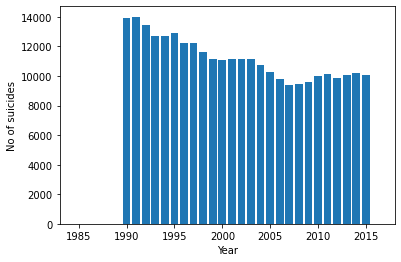

Ukraine:
[10050.  9751. 10887. 11666. 12469. 13826. 14541. 15160. 14903. 14789.
 14363. 14467. 13131. 12536. 12313. 11256. 10621. 10013. 10032.  9454.
  9715.  9089.     0.     0. 10645. 10700.  9058.     0.  7968.  7574.
  8973.     0.]


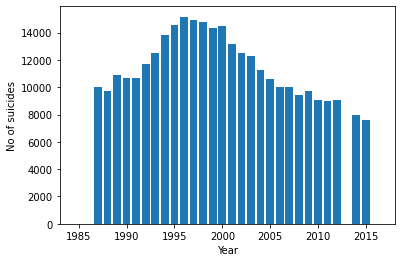

France:
[12161. 11599. 11715. 11644. 12251. 12041. 11819. 11279. 11139. 10534.
 10268. 10849. 10449. 10643. 10871. 10804. 10713. 10423. 10127. 10353.
 10499. 10379. 12501. 12529. 11403. 11502.  9743.  9600.  8881.     0.
 10408.     0.]


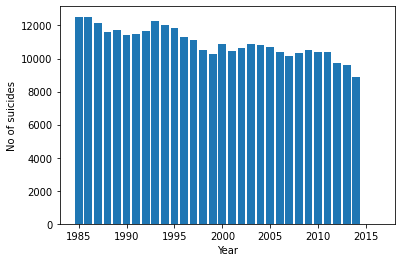

Japan:
[23663. 22676. 21013. 20756. 20353. 20744. 21249. 21967. 23280. 31458.
 31115. 29989. 29132. 29715. 31881. 30034. 30369. 29769. 30665. 30073.
 30523. 29411. 23257. 25484. 20002. 19780. 26338. 25991. 24357. 23092.
 28766.     0.]


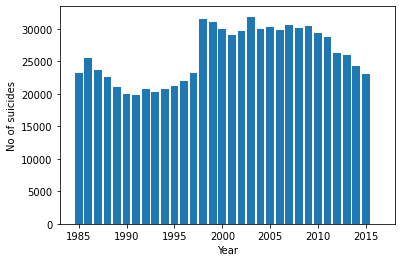

United States:
[30783. 30388. 30218. 30471. 31084. 31123. 31272. 30879. 30517. 30558.
 29183. 29343. 30607. 31645. 31477. 32428. 32629. 33292. 34596. 36030.
 36900. 38362. 29446. 30892. 30895. 30790. 40596. 41143. 42769. 44189.
 39508.     0.]


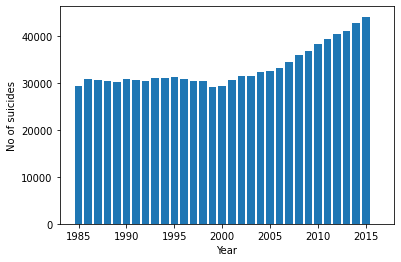

Russian Federation:
[    0.     0. 37921. 45923. 55846. 61420. 60548. 57511. 54746. 51518.
 56974. 56619. 56958. 55024. 51445. 49096. 45802. 42614. 41149. 38211.
 37408. 33356.     0.     0. 39028. 39281. 29643. 28690. 26541. 25432.
 31038.     0.]


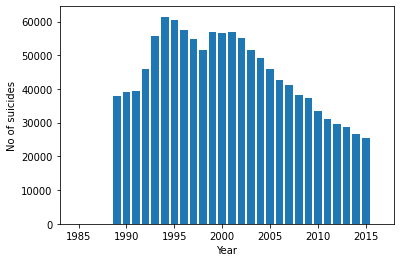

In [93]:
ind = np.argpartition(avgs, -6)[-6:]  #this will find top 6 values from avgs array
print(c[ind])                         #this prints top 6 countries
s=c[ind]
#now we will again run a for loop which will print and plot total number of suicides per year for each country in top 6.
sum=0
y=df['year'].unique()
for x in s:
  print(x + ":" )
  arr=np.zeros(len(df['year'].unique()))

  for i in range(len(df['country'])):    
    if x==df['country'][i]:     
      arr[np.where(y==df['year'][i])] += df['suicides_no'][i]
      
        
  print(arr) 
   
  plt.bar(y,arr)
  plt.xlabel('Year')
  plt.ylabel('No of suicides')
  plt.show()


## b. For the same six countries compare the mix of age groups. What does the plot tell you about the differences or similarities by country?

Germany:
[ 47356. 102683.  27249.  99684.  14094.    196.]


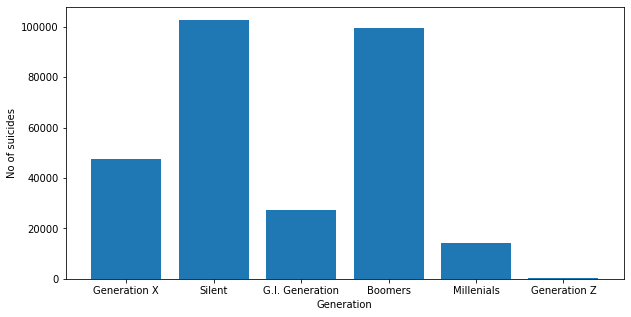

Ukraine:
[ 58518.  98728.  24840. 116279.  21171.    414.]


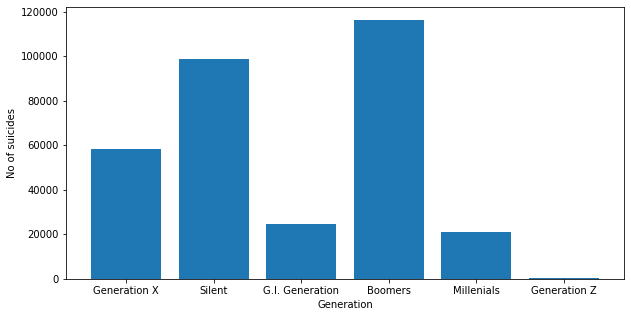

France:
[ 52831. 103816.  50767. 110173.  11291.    249.]


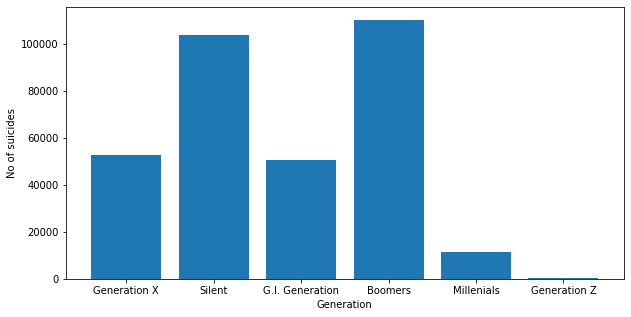

Japan:
[133292. 297885.  90657. 241420.  42991.    657.]


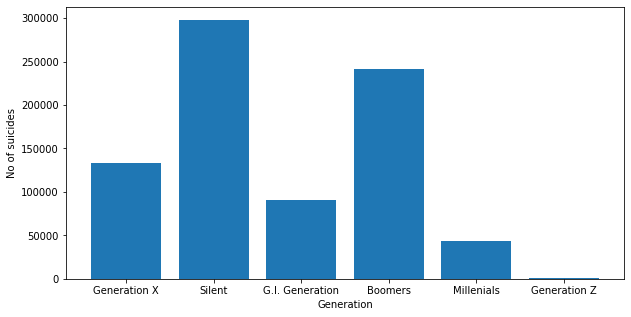

United States:
[253704. 228971.  89865. 354662. 104032.   2779.]


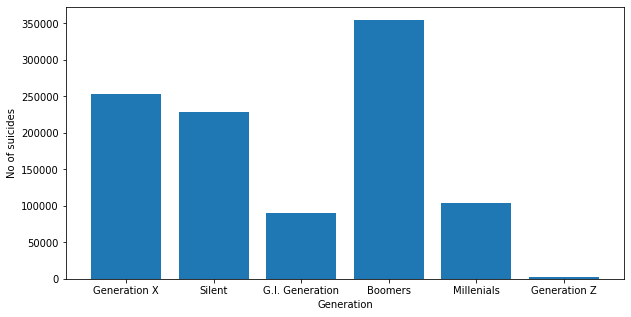

Russian Federation:
[275309. 290471.  51699. 470925. 119618.   1720.]


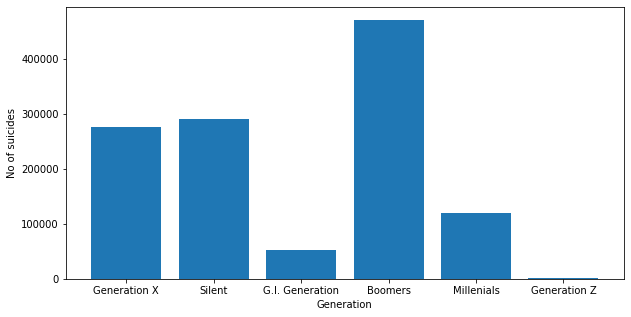

In [94]:
y=df['generation'].unique()
for x in s:
  print(x + ":" )
  arr=np.zeros(len(y))
  q=0
  for i in range(len(df['country'])):    
    if x==df['country'][i]:
      arr[np.where(y==df['generation'][i])] += df['suicides_no'][i]
  print(arr)
  plt.figure(figsize=(10,5))
  plt.bar(y,arr)
  plt.xlabel('Generation')
  plt.ylabel('No of suicides')
  plt.show()    

Here we can observe that in all countries generation z has very less number of suicides while boomers has very high no of suicides. In germany,ukrain,japan and france silent generation has very high number of suicides as compared to other generations in country. While in USA and Russia, GenX has high suicide rate than other countries.

## c. Plot an appropriate set of graphs or charts that highlight the consistency of difference between males and females when it comes to suicide rates.

I plotted boxplots and barplots for male vs female. And from both plots we can clearly see that male have very high suicide rate as compared to female.

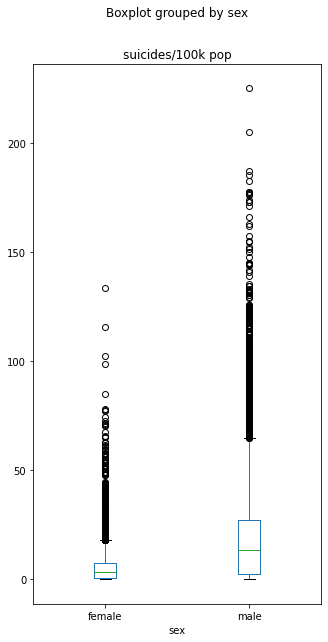

In [95]:
df.boxplot(by='sex', column='suicides/100k pop',grid=False,figsize=(5,10))

Text(0, 0.5, 'Total no of suicides')

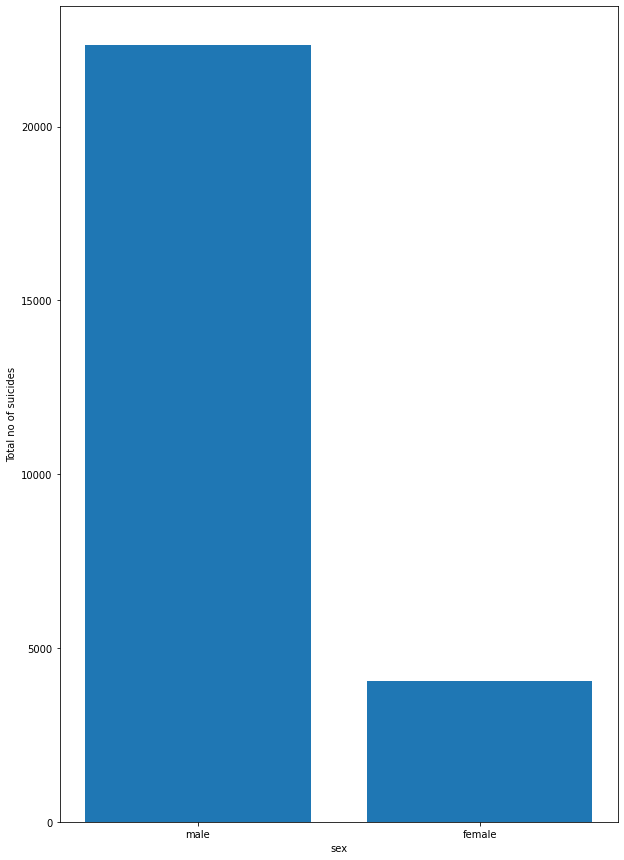

In [96]:
plt.figure(figsize=(10,15))
plt.bar(df['sex'],df['suicides_no'])
plt.xlabel('sex')
plt.ylabel('Total no of suicides')

## d. Using an appropriate graph, show the worst year for each generation in the US

Generation X


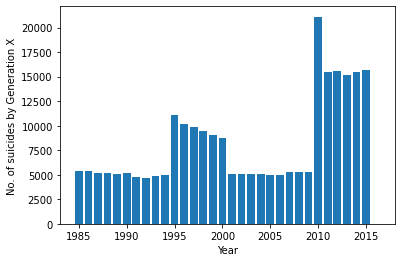

 Worst year for Generation X is [2010]
Silent


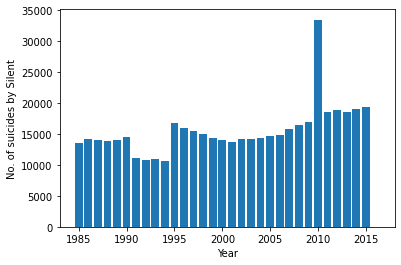

 Worst year for Silent is [2010]
G.I. Generation


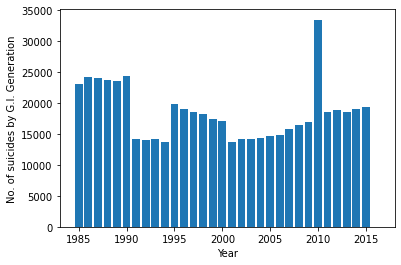

 Worst year for G.I. Generation is [2010]
Boomers


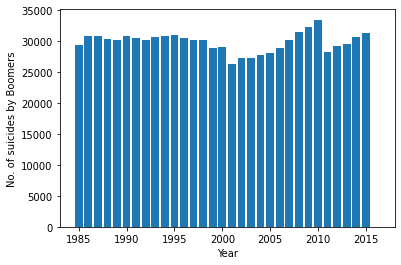

 Worst year for Boomers is [2010]
Millenials


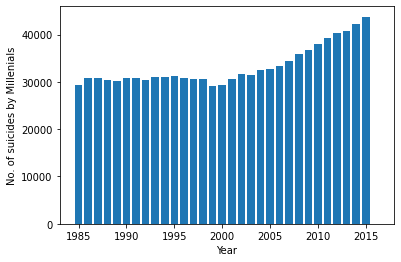

 Worst year for Millenials is [2015]
Generation Z


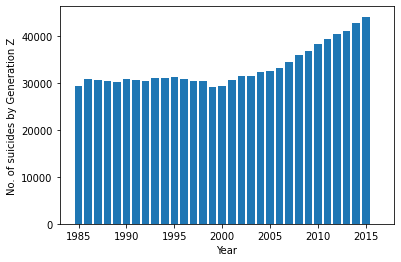

 Worst year for Generation Z is [2015]


In [97]:
x='United States'
z=df['year'].unique()
y=df['generation'].unique()
arr=np.zeros(len(z))
for e in range(len(y)):
 for i in range(len(df['country'])):    
  if x==df['country'][i]:
      if df['generation'][i]==y[e]:
       arr[np.where(z==df['year'][i])] += df['suicides_no'][i]
 print(y[e])       
 plt.bar(z,arr)
 plt.xlabel('Year')
 plt.ylabel('No. of suicides by '+ y[e])
 plt.show()
 print(" Worst year for "+ str(y[e]) +" is "+ str(z[np.where(arr==arr.max())]))


## e. Plot a bihistogram for a few specific countries (for a year, say 2000) for male and female populations by age ranges to highlight some differences in sex ratios between countries

Albania
Canada
Greece
Malta
Thailand


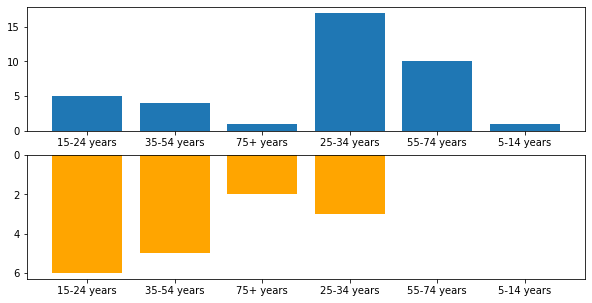

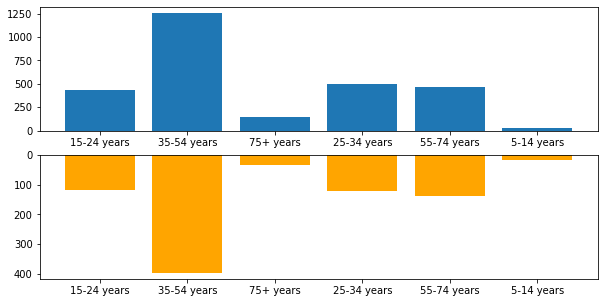

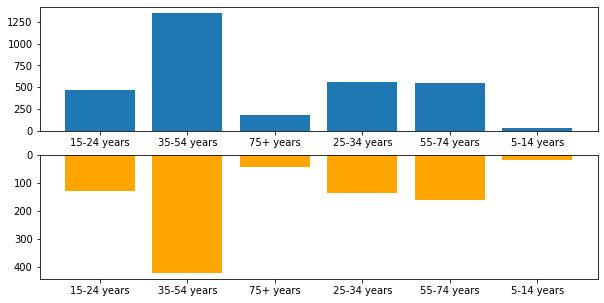

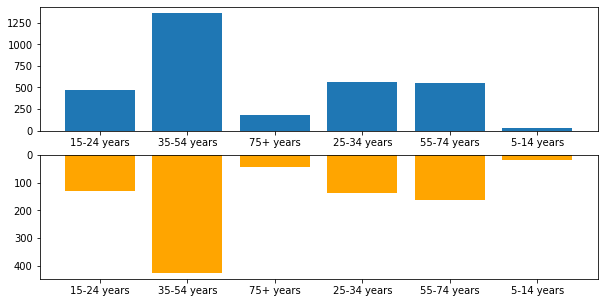

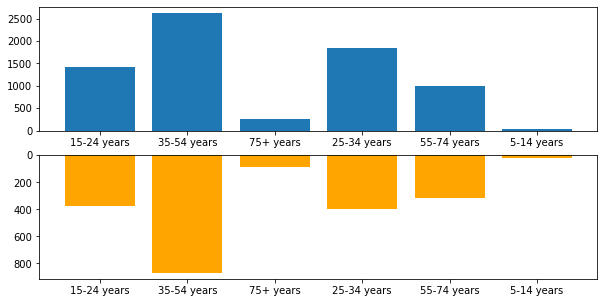

In [98]:

y=df['age'].unique()
green =np.zeros(len(df['age'].unique()))
blue = np.zeros(len(df['age'].unique()))

co=['Albania','Canada','Greece','Malta','Thailand']
for x in co:
 for i in range(len(df['country'])):
  if df['country'][i]== x:
    if df['year'][i]== 2000 : 
      if df['sex'][i]=='male':
          green[np.where(y == df['age'][i])[0][0]] += df['suicides_no'][i] 
      else:
          blue[np.where(y == df['age'][i])[0][0]] += df['suicides_no'][i]
 print(x)
 fig =plt.figure(figsize=(10,5))
 ax = fig.add_subplot(211)
 ax2 = fig.add_subplot(212)
 ax.bar(y,green)
 ax2.bar(y,blue,color='orange')
 ax2.invert_yaxis()
 fig.show()

## f. Show a bubble plot to show the relation between suicide rates, human development index (HDI),and population. Due to the large spread in population, you might have to use a transform. Isthere any interesting observation?

I left this question